In [95]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

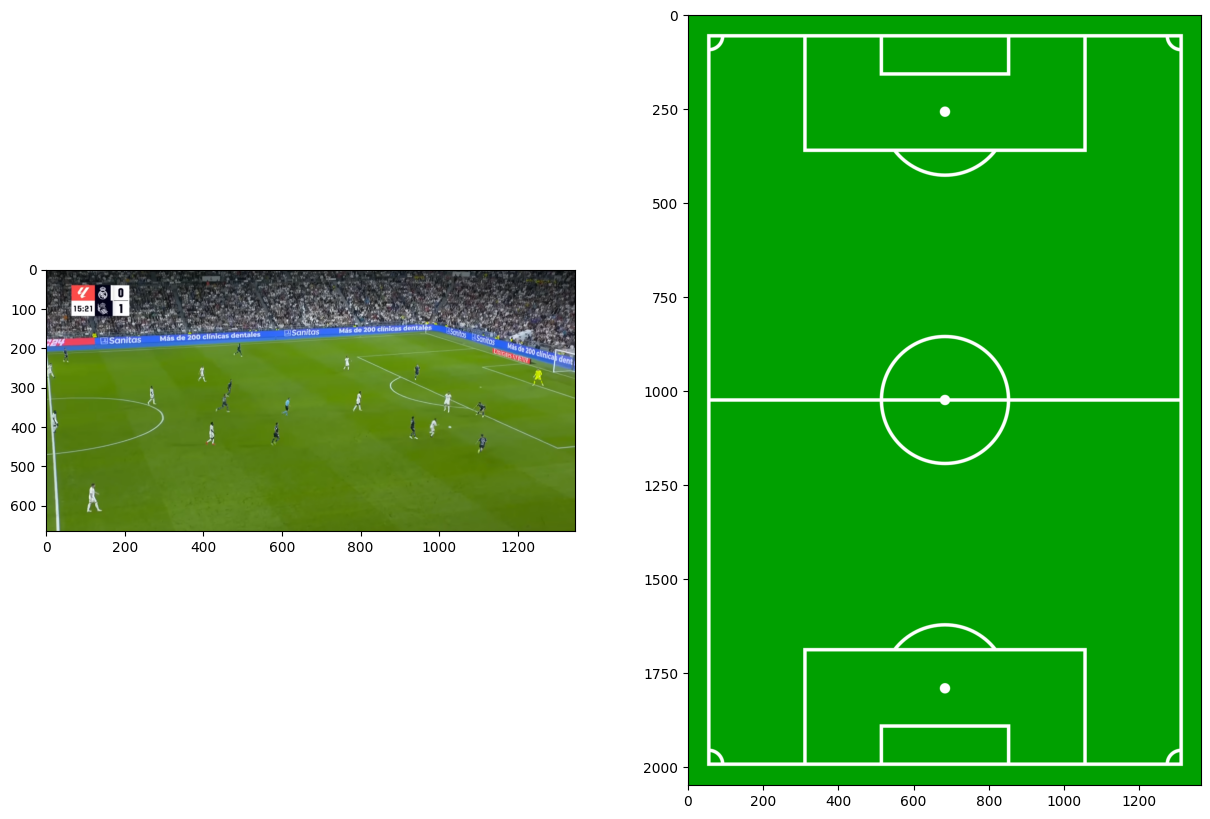

In [96]:
img = cv2.cvtColor(cv2.imread('field.png'), cv2.COLOR_BGR2RGB)
field = cv2.cvtColor(cv2.imread('field_2d.jpg'), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(img)
ax[1].imshow(field)

## Select a few points

In [152]:
P1 = (790, 220)
P1_2D = (310, 360)

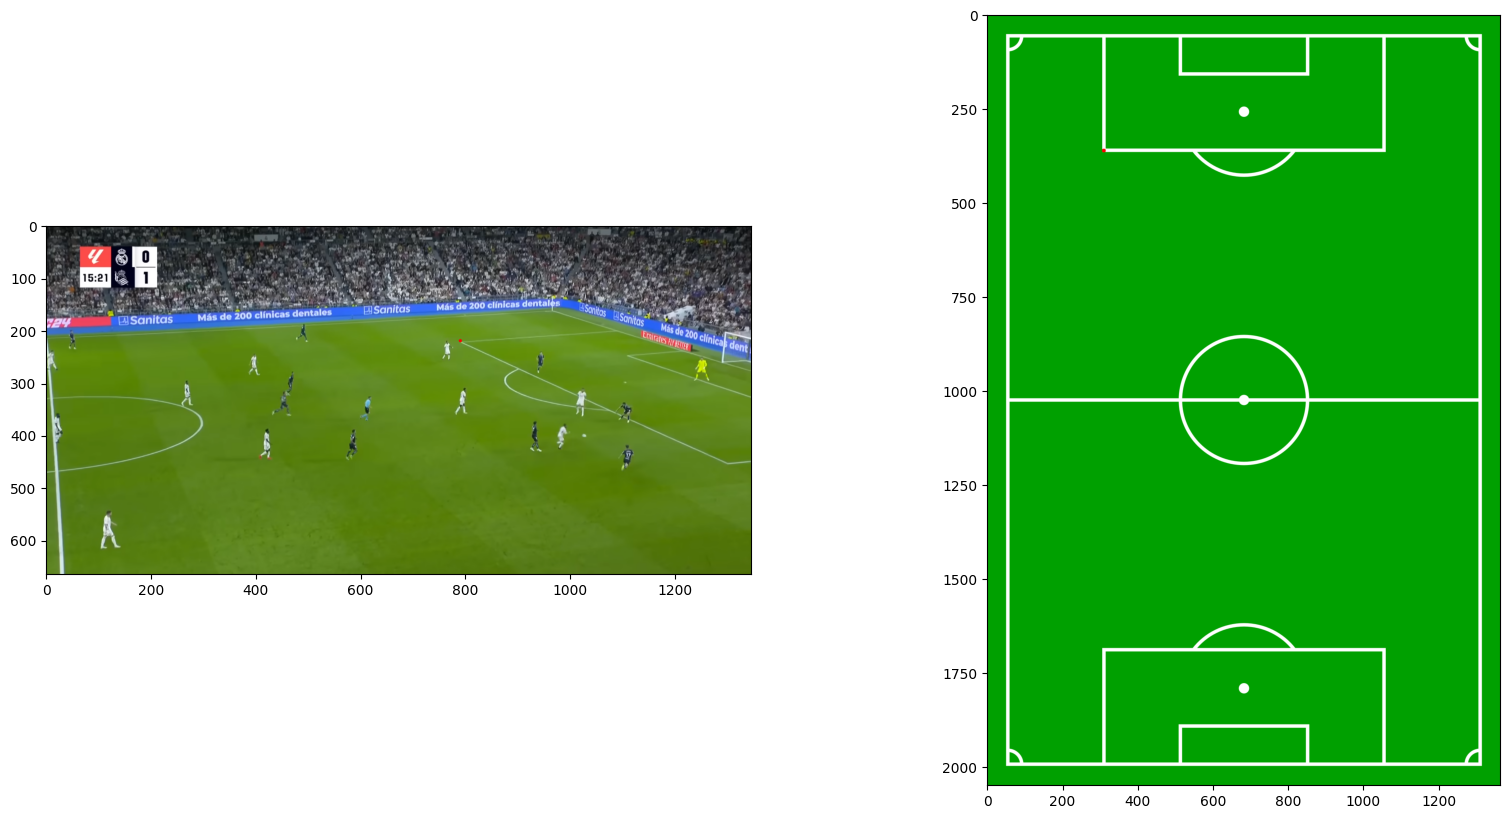

In [235]:
## draw point in (850, 200)
corner1 = img.copy()
corner1 = cv2.circle(corner1, P1, 3, (255, 0, 0), -1)

corner1_2d = field.copy()
corner1_2d = cv2.circle(corner1_2d, P1_2D, 5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner1)
ax[1].imshow(corner1_2d)


In [160]:
P2 = (1300, 455)
P2_2D = (1050, 360)

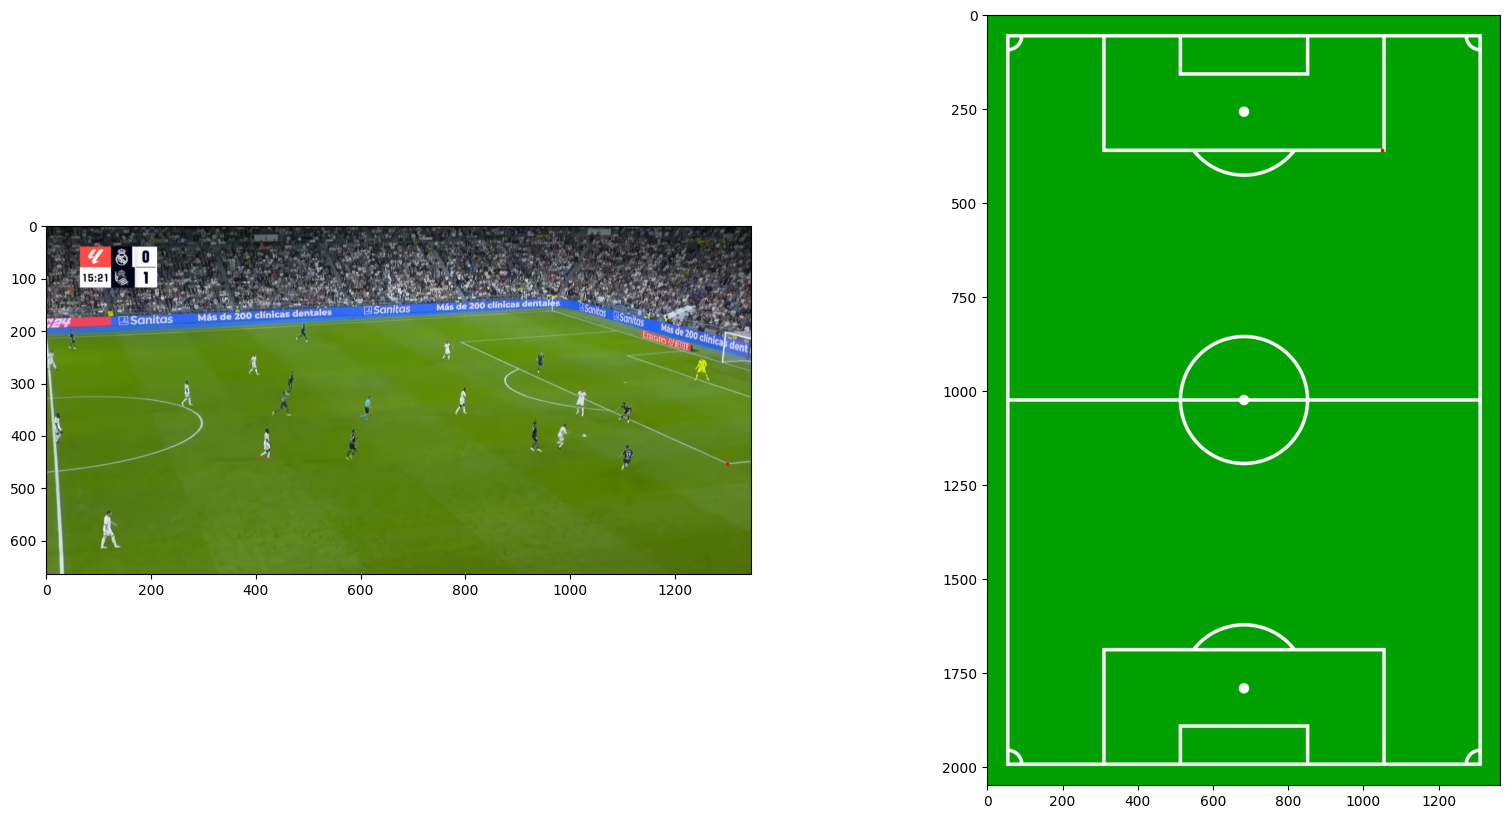

In [234]:
corner2 = img.copy()
corner2 = cv2.circle(corner2, P2, 3, (255, 0, 0), -1)

corner2_2d = field.copy()
corner2_2d = cv2.circle(corner2_2d,P2_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner2)
ax[1].imshow(corner2_2d)

In [242]:
P3 = (1090,200)
P3_2D = (310, 60)

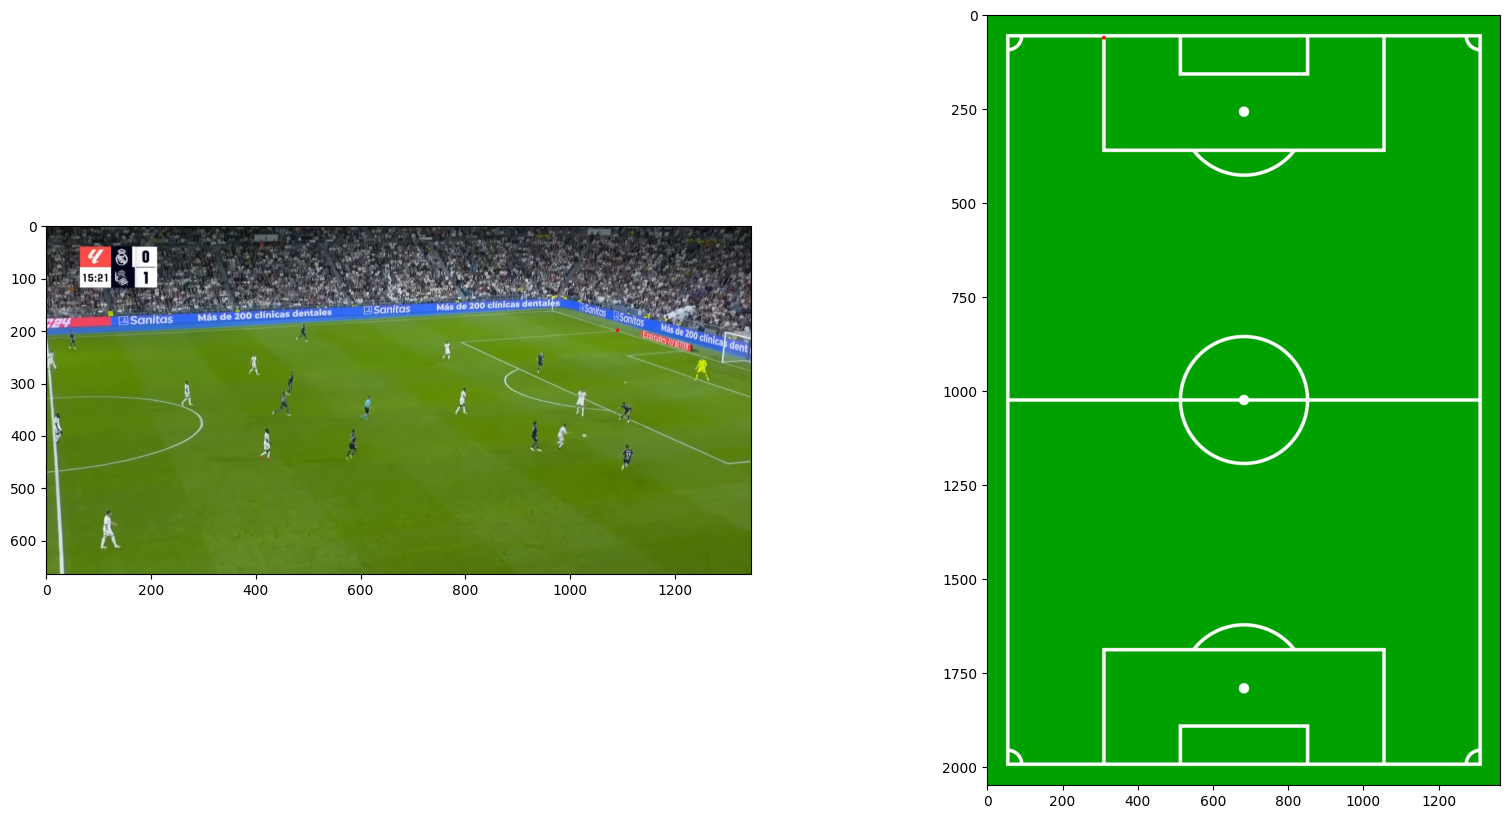

In [243]:
corner3 = img.copy()
corner3 = cv2.circle(corner3, P3, 3, (255, 0, 0), -1)

corner3_2d = field.copy()
corner3_2d = cv2.circle(corner3_2d,P3_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner3)
ax[1].imshow(corner3_2d)

In [260]:
P4 = (965,165)
P4_2D = (60, 60)

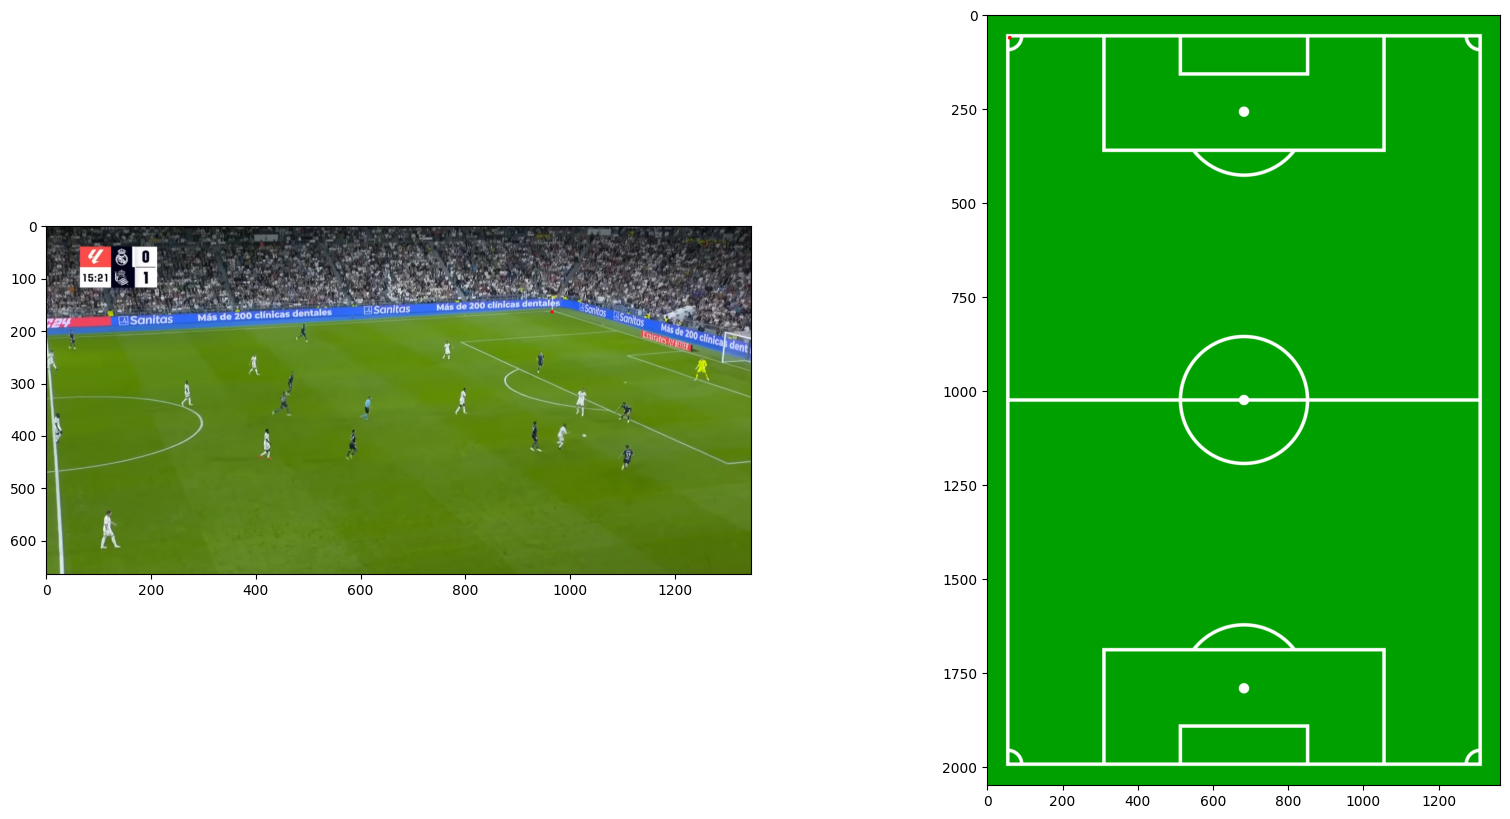

In [261]:
corner4 = img.copy()
corner4 = cv2.circle(corner4, P4, 3, (255, 0, 0), -1)

corner4_2d = field.copy()
corner4_2d = cv2.circle(corner4_2d,P4_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner4)
ax[1].imshow(corner4_2d)

In [180]:
P5 = (1110,300)
P5_2D = (680, 255)

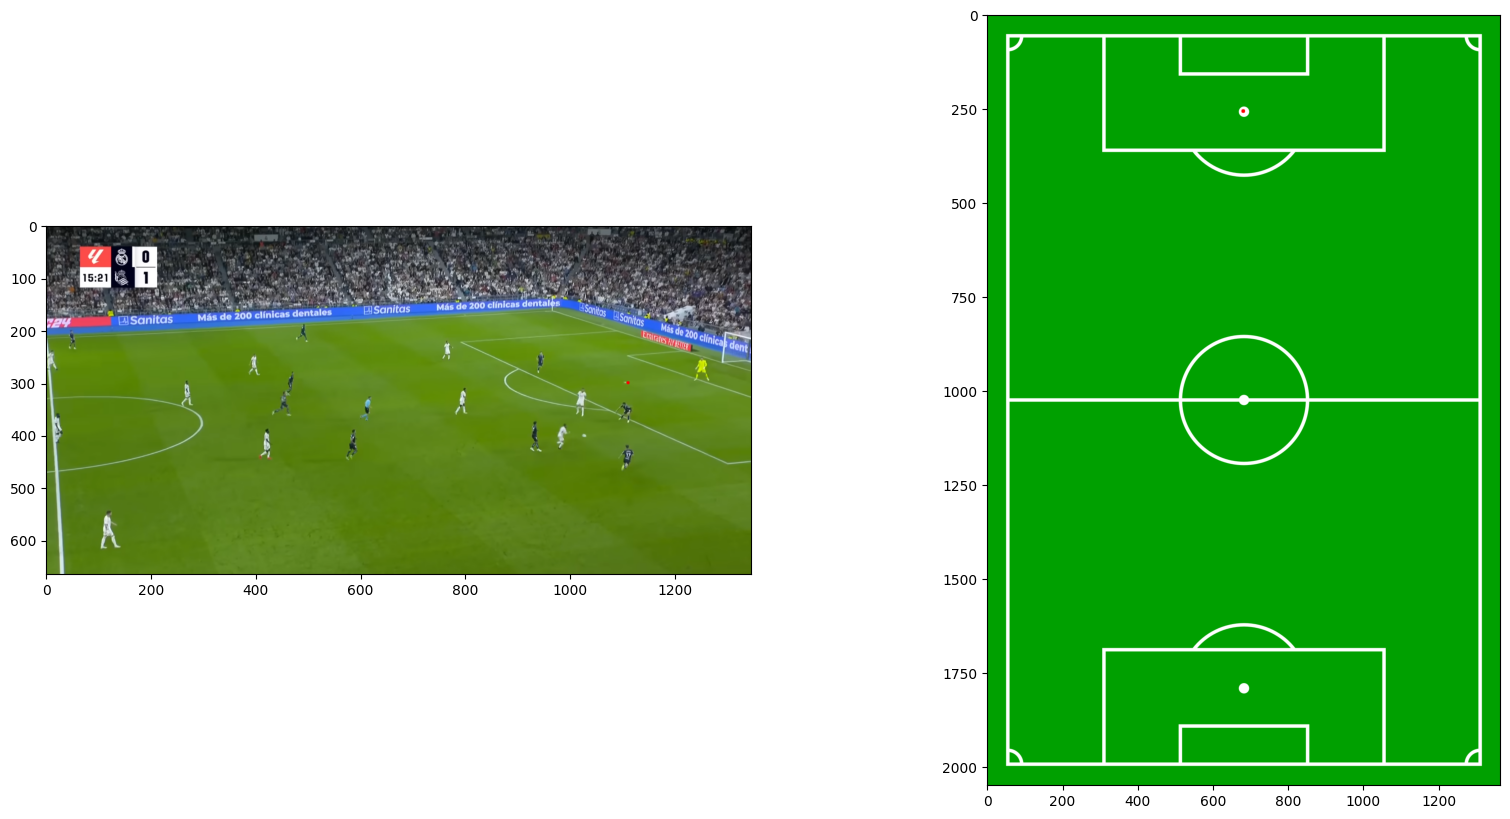

In [262]:
corner5 = img.copy()
corner5 = cv2.circle(corner5, P5, 3, (255, 0, 0), -1)

corner5_2d = field.copy()
corner5_2d = cv2.circle(corner5_2d,P5_2D,  5, (255, 0, 0), -1)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(corner5)
ax[1].imshow(corner5_2d)

## Find homography

In [263]:
src_pts = np.array([P1,P2,P3,P4,P5]).reshape(-1,2)
dst_pts = np.array([P1_2D,P2_2D,P3_2D,P4_2D,P5_2D]).reshape(-1,2)

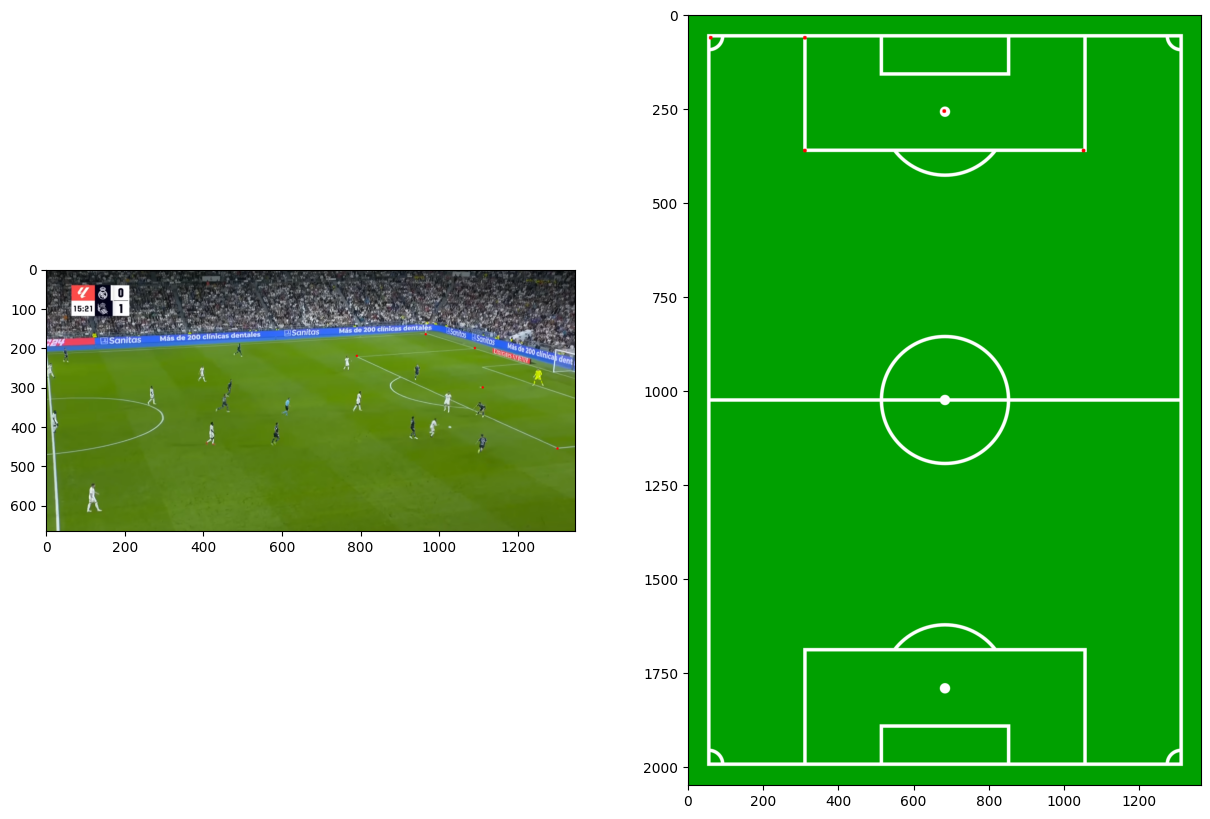

In [264]:
points = img.copy()
points_2d = field.copy()

for src,dst in zip(src_pts,dst_pts):
    points = cv2.circle(points, tuple(src), 3, (255, 0, 0), -1)
    points_2d = cv2.circle(points_2d, tuple(dst), 5, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(points)
ax[1].imshow(points_2d)

In [265]:
H, status = cv2.findHomography(src_pts, dst_pts)
print(H)
print(status)

[[-2.07695777e+01 -2.48524751e+02  5.85202824e+04]
 [ 3.15743302e+01 -1.24834893e+02 -1.21906160e+04]
 [-2.31833493e-02 -1.07062514e-01  1.00000000e+00]]
[[1]
 [1]
 [1]
 [1]
 [1]]


## Warp perspective

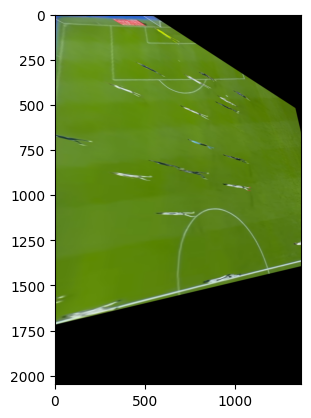

In [266]:
im_out = cv2.warpPerspective(img, H, (field.shape[1],field.shape[0]))
plt.imshow(im_out)

# Find homography of new point

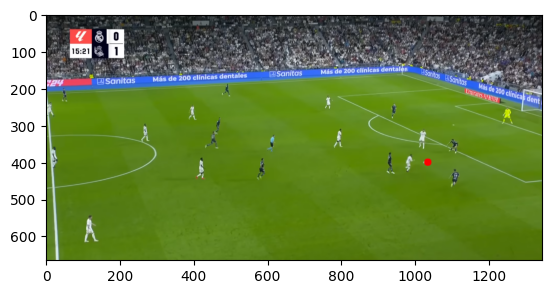

In [216]:
BALL = (1035, 400)
ball = img.copy()
ball = cv2.circle(ball, BALL, 10, (255, 0, 0), -1)
plt.imshow(ball)